In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
 
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')
df.head()


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [3]:
df.drop(['day', 'month', 'year'], axis=1, inplace=True)


In [4]:
df.head()


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [5]:
# Encoding
df['Classes'] = np.where(df['Classes'].str.contains("not fire"), 0, 1)


In [6]:
# Independent And dependent features
X = df.drop('FWI', axis=1)
y = df['FWI']


In [7]:
X


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [8]:
y


0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [9]:
# train test spliting
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)


In [10]:
X_test.shape, y_test.shape


((61, 11), (61,))

In [11]:
X_train.shape, y_train.shape


((182, 11), (182,))

In [12]:
X_train.corr()


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


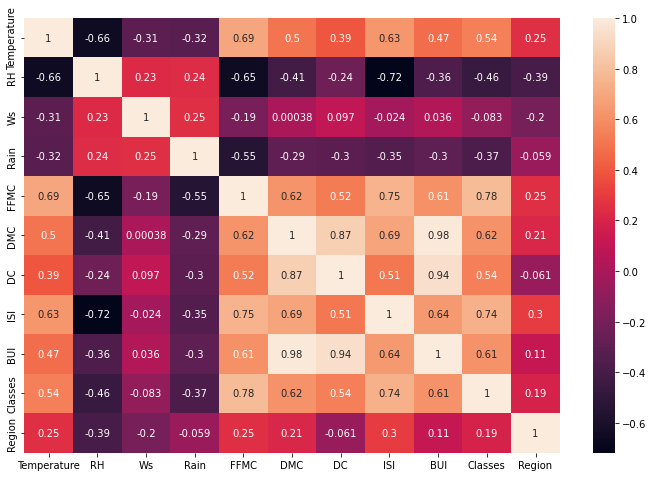

In [13]:
# plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(X_train.corr(), annot=True)
plt.show()


In [14]:
# check multicollenearity

def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr


In [15]:
# threshhold --domain expertise
corr_features = correlation(X_train, 0.85)


In [16]:
corr_features


{'BUI', 'DC'}

In [17]:
X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)
X_train.shape, X_test.shape


((182, 9), (61, 9))

**Feature Scalling or Standardization**

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [19]:
X_train_scaled


array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

**Box plots to understand effect of standard scaler**

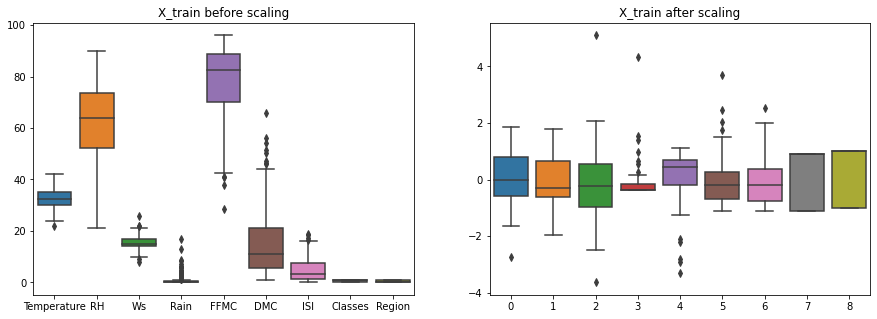

In [20]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train before scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_test_scaled)
plt.title('X_train after scaling')
plt.show()


**Linear Regression Model**

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
y_pred = linreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
rmsme = np.sqrt(mse)
print('MSE', mse)
print('RMSE', rmsme)
print('Mean absolute error', mae)
print('R2 store', score)


MSE 0.6742766873791592
RMSE 0.8211435242265259
Mean absolute error 0.5468236465249984
R2 store 0.9847657384266951


In [22]:
linreg.intercept_


7.156043956043957

In [23]:
linreg.coef_


array([-0.03634495, -0.17441065,  0.00703214, -0.04108155, -0.82319823,
        3.6982583 ,  4.84057298,  0.40422124, -0.39259928])

In [24]:
# Adjusted R2 square
1 - (1-score) * (len(y_test)-1) / (len(y_test) - X_test.shape[1]-1)


0.9820773393255237

### **Lasso Regression**

In [25]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


In [26]:
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_test_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
score = r2_score(y_test, y_test_pred)
rmse = np.sqrt(mse)
print('MAE', mae)
print('MSE', mse)
print('SCORE', score)
print('RMSE', rmse)


MAE 1.1331759949144085
MSE 2.248345891897475
SCORE 0.9492020263112388
RMSE 1.4994485292591657


In [27]:
1 - (1-score) * (len(y_test)-1) / (len(y_test) - X_test.shape[1]-1)


0.9402376780132222

### **Ridge Regression model**

In [28]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_test_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
score = r2_score(y_test, y_test_pred)
rmse = np.sqrt(mse)
print('MAE', mae)
print('MSE', mse)
print('SCORE', score)
print('RMSE', rmse)


MAE 0.5642305340105719
MSE 0.6949198918152084
SCORE 0.9842993364555513
RMSE 0.8336185529456553


In [29]:
1 - (1-score) * (len(y_test)-1) / (len(y_test) - X_test.shape[1]-1)


0.9815286311241781

### **Elastic Regression**

In [30]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
elastic.fit(X_train_scaled, y_train)
y_test_pred = elastic.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
score = r2_score(y_test, y_test_pred)
rmse = np.sqrt(mse)
print('MAE', mae)
print('MSE', mse)
print('SCORE', score)
print('RMSE', rmse)


MAE 1.8822353634896
MSE 5.517251101025224
SCORE 0.8753460589519703
RMSE 2.3488829474933874


In [31]:
1 - (1-score) * (len(y_test)-1) / (len(y_test) - X_test.shape[1]-1)


0.8533483046493768

In [32]:
import pickle
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(ridge, open('ridge.pkl', 'wb'))
